[![Project Status: Active – The project has reached a stable, usable state and is being actively developed.](https://www.repostatus.org/badges/latest/active.svg)](https://www.repostatus.org/#active)
[![PyPI version](https://badge.fury.io/py/geoshapes.svg)](https://badge.fury.io/py/geoshapes)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/abiraihan/geoshapes/f3bd257614ae6a1a0badcb592f70ce36b6cb50b2?urlpath=lab%2Ftree%2Fexample%2FmergeShape.ipynb) <--| You can run this notebook from mybinder.org without installing any python dependency

## mergeShape

In [1]:
import shapely, geopandas
from geoshapes import splitShape
from geoshapes import mergeShape
%matplotlib inline

### Create a psuedo Polygon geometry for processing
####   - Split a polygon geometry

In [2]:
def getSplitedGeoms(geoms, split, rotation):
    
    splitGeometry = splitShape.splitGeom(geoms, split, rotation = rotation)
    splitGeometry['ids'] = range(len(splitGeometry))
    ax = splitGeometry.plot(figsize = (28,7), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
    splitGeometry.apply(
        lambda x: ax.annotate(
            text=f"{x.ids}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=14),axis=1
        )
    return splitGeometry

  -- Found rotation angle 120 degree
  -- Analyzing suitable radians for the major axis at 120 degree
  -- Analyzing Polygon Rotation is completed
  -- Major Axis Identified Successfully
  -- Point location for polygon geometry identified successfully
  -- Geometry splited successfully and polygon defined accordingly
  -- Number of Splited Polygon before merge : 50


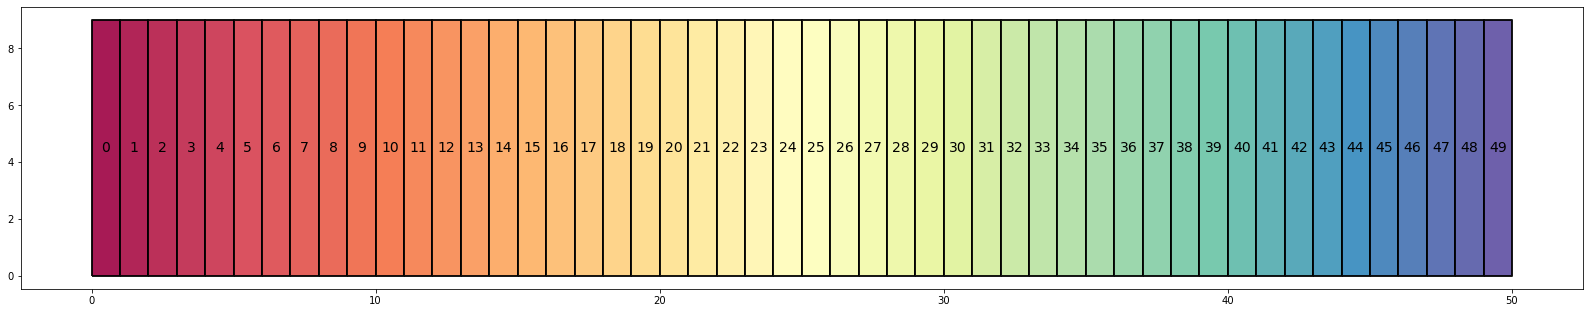

In [3]:
polys = shapely.geometry.Polygon([(0, 0), (0,9), (50, 9), (50, 0)])
splitedData = getSplitedGeoms(polys, 50, 120)

### mergePolygon
See **help(mergeShape.mergePolygon)** for more details about the parameters
1. mergePolygon require a shapely Polygon / GeoDataFrame (geomData) feature to merge splited/number of geometry.
2. mergePolygon require a number to merge the polygon at number for merging the feature from the given geometry.

In [4]:
#help(mergeShape.mergePolygon)

In [5]:
def plotMergedPolygon(splitedData, mergedNum:int):
    geoData = mergeShape.mergePolygon(splitedData, mergedNum)
    geoData['ids'] = range(len(geoData))
    ax = geoData.plot(figsize = (7,5), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
    ax.set_title(f'Number of Merged Polygon : {mergedNum}')
    geoData.apply(
        lambda x: ax.annotate(
            text=f"{x.ids+1}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=10),axis=1
        )
    return geoData

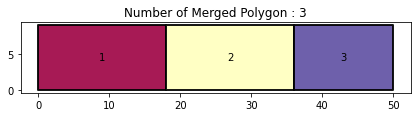

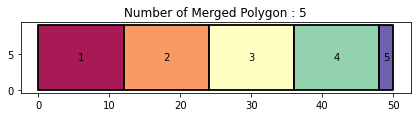

In [6]:
geo3 = plotMergedPolygon(splitedData, 3)
geo5 = plotMergedPolygon(splitedData, 5)

### mergeSilevers
See **help(mergeShape.mergeSilevers)** for more details about the parameters
1. mergeSilevers require list of shapely polygon geometry to merge with it neighbor geometry.
2. mergeSilevers require a least number of geometry that should be returned after dissolvint silever with its neighboring geometry.

In [7]:
#help(mergeShape.mergeSilevers)

In [8]:
polys = shapely.geometry.Polygon([(0, 0), (0,5), (5, 3), (4, 2), (7, 0)])
from geoshapes import utils
#Input Polygon geometry for mergeSilever function
def mergeSileversPoly(polys, split, rotations):
    splitGeometry = splitShape.splitGeom(polys, split, rotation = rotations)
    splitGeometry['ids'] = range(len(splitGeometry))
    ax1 = splitGeometry.plot(figsize = (7,5), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
    ax1.set_title('splitShape.splitGeom | splited Polygon : 4')
    splitGeometry.apply(
        lambda x: ax1.annotate(
            text=f"{x.ids+1}",
            xy=x.geometry.centroid.coords[0],
            ha='center',
            va='center',
            size=15
            ),
        axis=1
        )
    return splitGeometry

def removeSileversGeoms(polys, leastNum, runs):
    if isinstance(polys, geopandas.GeoDataFrame):
        listGeoms = [i for i in polys.geometry]
    elif isinstance(polys, list):
        listGeoms = polys
    geoData = geopandas.GeoDataFrame(geometry = mergeShape.mergeSilevers(listGeoms, leastNum))
    lenPoly = len(utils.singlePolygon(geoData))
    if lenPoly > leastNum:
        geoData = utils.singlePolygon(geoData)
        geoData = geopandas.GeoDataFrame(geometry = geoData, crs = 'EPSG:4326')
        geoData['ids'] = range(len(geoData))
        ax = geoData.plot(figsize = (7,5), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
        ax.set_title(f'Iteration{runs+1}: Merged silever Polygon found more than {leastNum} which is {len(geoData)}')
        geoData.apply(
            lambda x: ax.annotate(
                text=f"{x.ids+1}",
                xy=x.geometry.centroid.coords[0],
                ha='center',
                va='center',
                size=15
                ),
            axis=1
            )
    else:
        geoData['ids'] = range(len(geoData))
        ax = geoData.plot(figsize = (7,5), alpha = 0.9, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
        ax.set_title(f'Iteration {runs+1}: mergeShape.mergeSilevers | Merged Polygon : {len(geoData)}')
        geoData.apply(
            lambda x: ax.annotate(
                text=f"{x.ids+1}",
                xy=x.geometry.centroid.coords[0],
                ha='center',
                va='center',
                size=15
                ),
            axis=1
            )
    return geoData

  -- Found rotation angle 120 degree
  -- Analyzing suitable radians for the major axis at 120 degree
  -- Analyzing Polygon Rotation is completed
  -- Major Axis Identified Successfully
  -- Point location for polygon geometry identified successfully
  -- Geometry splited successfully and polygon defined accordingly
  -- Number of Splited Polygon before merge : 4


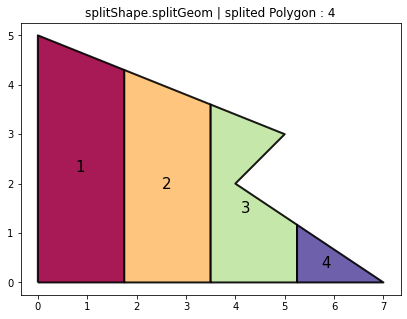

In [9]:
splitedGeoms = mergeSileversPoly(polys, 4, 120)

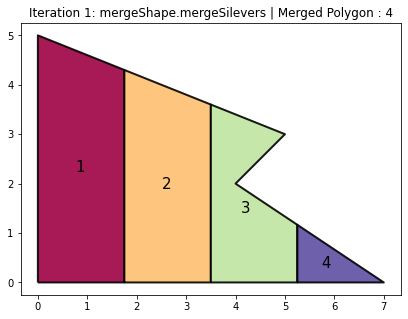

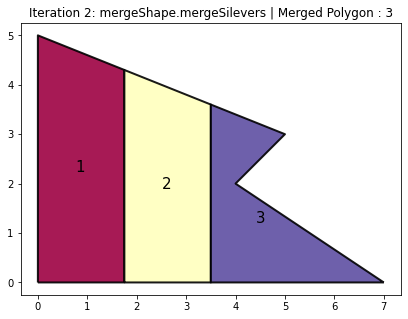

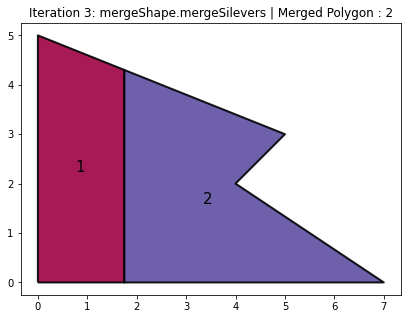

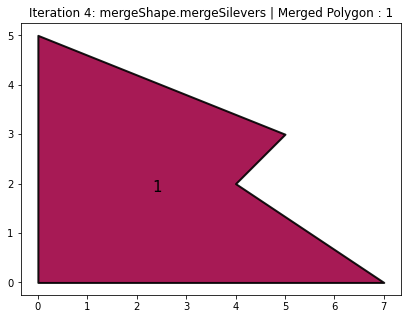

In [10]:
p = len(splitedGeoms)
for i in range(p):
    removeSilevers = removeSileversGeoms(splitedGeoms, p, i)
    p-=1

### mergeOverlaps
See **help(mergeShape.mergeOverlaps)** for more details about the parameters
1. mergeOverlaps require A single shapely polygon geometry as a source geometry to validate the overlaps geometry to check validity.
2. mergeOverlaps require a list of shapely polygon geometry collection that should be returned after dissolve overlaps with its neighboring geometry.

In [11]:
#help(mergeShape.mergeOverlaps)

In [12]:
polys = shapely.geometry.Polygon([(0, 0), (0,5), (5, 3), (4, 2), (7, 0)])

overlapsPoly0 = shapely.geometry.Polygon(
    [(1.75, 0), (0, 0), (0, 5),
     (1.75, 4.3), (1.75, 0)]
    )

overlapsPoly1 = shapely.geometry.Polygon(
    [(3.5, 0), (1.5, 0), (1.5, 4.406666666666667),
     (3.5, 3.6), (3.5, 0)]
    )

overlapsPoly2 = shapely.geometry.Polygon(
    [(7, 0), (5.25, 0), (3.5, 0), (3.5, 3.6), (5, 3),
     (4, 2), (5.25, 1.166666666666667), (7, 0)]
    )

Text(0.5, 1.0, 'Source Geometry')

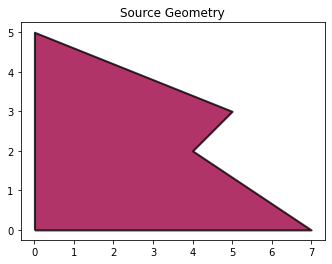

In [13]:
#Input Polygon as source geometry for mergeoverlaps function
sourceGeom = geopandas.GeoDataFrame(geometry = [polys])
source = sourceGeom.plot(cmap = 'Spectral', alpha = 0.8, edgecolor = 'k', linewidth = 2)
source.set_title('Source Geometry')

0    Annotation(0.853047, 2.32939, '1')
1     Annotation(2.46642, 2.00844, '2')
2     Annotation(4.51223, 1.28869, '3')
dtype: object

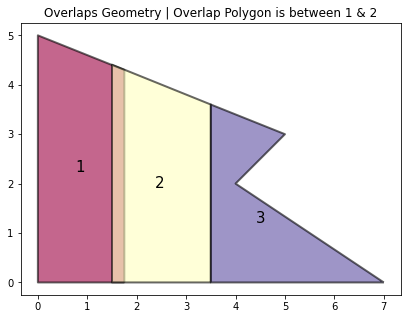

In [14]:
#Input overlaps Polygon geometry for mergeoverlaps function
overlapGeom = geopandas.GeoDataFrame(geometry = [overlapsPoly0, overlapsPoly1, overlapsPoly2])
overlapGeom['ids'] = range(len(overlapGeom))

ax1 = overlapGeom.plot(figsize = (7,5), alpha = 0.6, cmap = 'Spectral', edgecolor = 'k', linewidth = 2)
ax1.set_title('Overlaps Geometry | Overlap Polygon is between 1 & 2')
overlapGeom.apply(
    lambda x: ax1.annotate(
        text=f"{x.ids+1}",
        xy=x.geometry.centroid.coords[0],
        ha='center',
        va='center',
        size=15
        ),
    axis=1
    )

  --| Source Geometry Area is : 205000000001.0 square meter
  --| Processed Geometry Area is : 215941666666.67 square meter


0     Annotation(4.51223, 1.28869, '1')
1    Annotation(0.734043, 2.35319, '2')
2     Annotation(2.46642, 2.00844, '3')
dtype: object

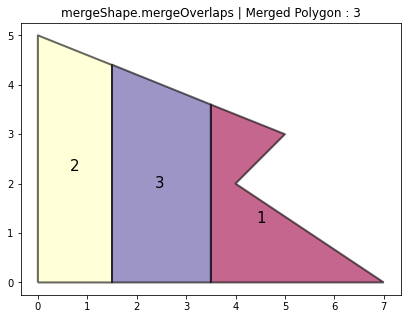

In [15]:
# Output Polygon geometry for mergeOverlaps function
geoData = geopandas.GeoDataFrame(
    geometry = mergeShape.mergeOverlaps(
        polys,
        [overlapsPoly0,
         overlapsPoly1,
         overlapsPoly2]
        )
    )

geoData['ids'] = range(len(geoData))
ax = geoData.plot(
    figsize = (7,5),
    alpha = 0.6,
    cmap = 'Spectral',
    edgecolor = 'k',
    linewidth = 2)

ax.set_title('mergeShape.mergeOverlaps | Merged Polygon : 3')

geoData.apply(
    lambda x: ax.annotate(
        text=f"{x.ids+1}",
        xy=x.geometry.centroid.coords[0],
        ha='center',
        va='center',
        size=15
        ),
    axis=1
    )